<a href="https://colab.research.google.com/github/HarshNVyas/ML-Projects/blob/main/Kaggle/Titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [ ]:
import pandas as pd
import numpy as np

# Load the training data
train_data = pd.read_csv('/content/train_titanic.csv')
test_data = pd.read_csv('/content/test_titanic.csv')

# Convert the DataFrame to a NumPy array
train_array = train_data.to_numpy()
test_array = test_data.to_numpy()

# Display the shape of the array to confirm
train_array.shape, test_array.shape

((891, 12), (418, 11))

The test data has been loaded into a NumPy array. It consists of 418 rows and 11 columns. This indicates 418 passengers in the test set with 11 features each. The test set has one less feature compared to the training set, likely because it doesn't include the target variable (survival outcome).

Now that we have both datasets loaded, we can move on to step 3: Exploring the data and writing insights. This involves analyzing the features, checking for missing values, understanding the distribution of different variables, etc.

Since we are working with numerical arrays, we'll need to remember the column indices for each feature. Alternatively, we can switch back to using the DataFrame format for easier data exploration and processing. DataFrames allow for more intuitive operations when dealing with tabular data.

# Exploring the Data

In [ ]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Missing Values:**

**Age**: 177 missing values.

**Cabin**: 687 missing values.

**Embarked**: 2 missing values.



**Summary Statistics for Numerical Features**


**PassengerId**: Ranges from 1 to 891 (as expected for 891 passengers).

**Survived**: About 38.38% of passengers in the training set survived.

**Pclass**: More passengers are in the 3rd class.

**Age**: The average age is approximately 29.7 years, with a wide range from 0.42 to 80 years.

**SibSp and Parch**: Majority of passengers do not have siblings/spouses or parents/children aboard.

**Fare**: Wide range in fares, indicating variation in passenger class and other factors.

The significant number of missing values in Age and Cabin needs to be addressed during data preprocessing. Embarked has a minimal number of missing values, which can be easily handled.

Next steps involve further exploration, such as analyzing categorical features, and understanding relationships between different features and survival.

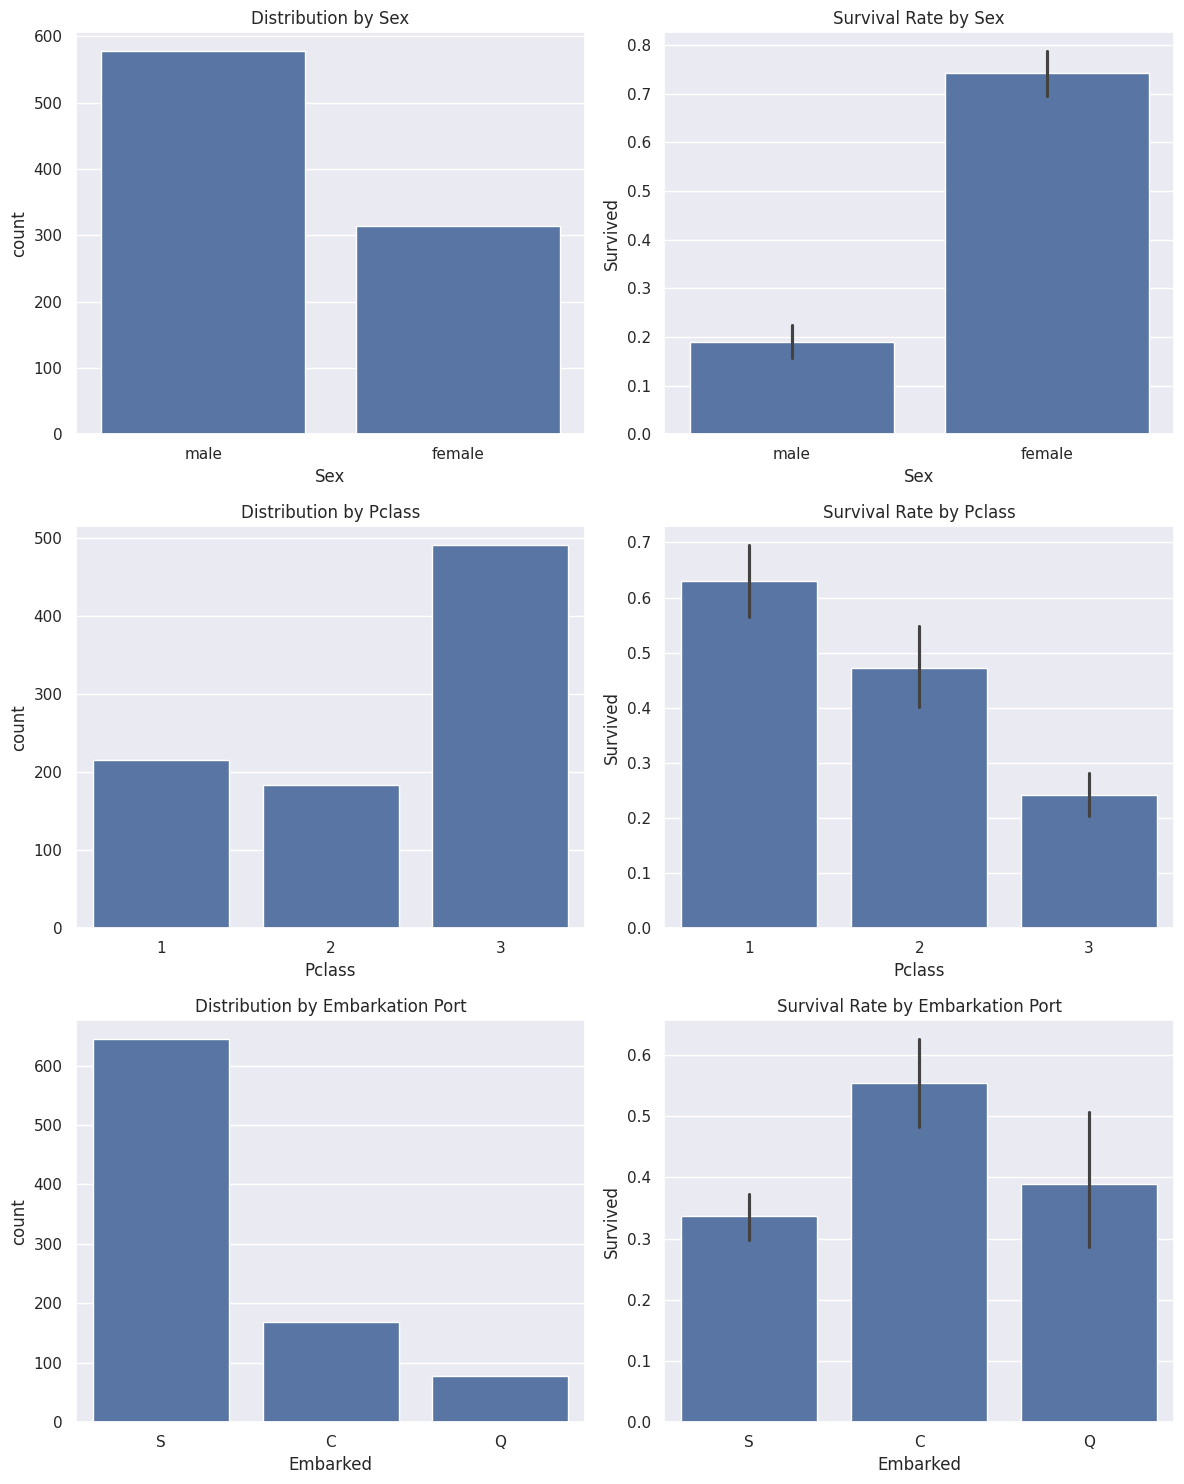

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set()

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Distribution of passengers by Sex
sns.countplot(x='Sex', data=train_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution by Sex')

# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=train_data, ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate by Sex')

# Distribution of passengers by Pclass
sns.countplot(x='Pclass', data=train_data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution by Pclass')

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data, ax=axes[1, 1])
axes[1, 1].set_title('Survival Rate by Pclass')

# Distribution of passengers by Embarked
sns.countplot(x='Embarked', data=train_data, ax=axes[2, 0])
axes[2, 0].set_title('Distribution by Embarkation Port')

# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=train_data, ax=axes[2, 1])
axes[2, 1].set_title('Survival Rate by Embarkation Port')

# Display the plots
plt.tight_layout()
plt.show()

The visualizations provide a clear representation of the distributions and survival rates based on the categorical features:

Distribution by Sex and Survival Rate by Sex:

The first row of plots shows the distribution of passengers by sex and the corresponding survival rates.
It appears that there were more males than females on board, but females had a higher survival rate.
Distribution by Pclass and Survival Rate by Pclass:

The second row shows the distribution of passengers by class (Pclass) and the survival rates per class.
Most passengers were in the 3rd class. The survival rate was higher for passengers in the higher classes (1st and 2nd).
Distribution by Embarkation Port and Survival Rate by Embarkation Port:

The last row shows the distribution of passengers by their embarkation port and their survival rates.
The majority of passengers embarked from Southampton. The survival rate varied by embarkation port, with passengers embarked from Cherbourg having a higher survival rate.
These insights are crucial for understanding the factors that influenced survival on the Titanic. Next, we can move on to preparing the data for machine learning algorithms, which involves handling missing values, encoding categorical variables, and feature scaling.

# Preparing Data to better Explore Patterns

In [ ]:
# Dropping the 'Cabin' column
train_data = train_data.drop(columns=['Cabin','Name','Ticket'])

# Filling missing values in 'Age' with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Filling missing values in 'Embarked' with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Checking if there are any more missing values
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

The missing values have been successfully handled:

The 'Cabin' column has been dropped.
Missing values in the 'Age' column have been filled with the median age.
Missing values in the 'Embarked' column have been filled with the most frequent value (mode).
Next, we'll move on to feature engineering, encoding categorical variables, and feature scaling.

Feature Engineering: We can create new features like 'FamilySize' from 'SibSp' (siblings/spouse aboard) and 'Parch' (parents/children aboard).
Encode Categorical Variables: Convert 'Sex' and 'Embarked' into numerical values.
Feature Scaling: Apply scaling to continuous features like 'Age' and 'Fare'.

In [ ]:
# Feature Engineering
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Encoding categorical variables
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Feature Scaling for 'Age' and 'Fare'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])

# Checking the modified dataframe
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,0,-0.565736,1,0,-0.502445,0,2
1,2,1,1,1,0.663861,1,0,0.786845,1,2
2,3,1,3,1,-0.258337,0,0,-0.488854,0,1
3,4,1,1,1,0.433312,1,0,0.420730,0,2
4,5,0,3,0,0.433312,0,0,-0.486337,0,1


# Exploring data using Logistic Regression and SVC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Splitting the data into features and target variable
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']

# Initialize classifiers
log_reg = LogisticRegression(random_state=42)
svm_clf = SVC(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
# Function to perform cross-validation and print scores
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Model: {model} \n Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})\n")

In [ ]:
# Evaluating each model

for clf in {log_reg, svm_clf, rf_clf}:
  evaluate_model(clf, X, y)

Model: RandomForestClassifier(random_state=42) 
 Accuracy: 0.81 (+/- 0.05)

Model: LogisticRegression(random_state=42) 
 Accuracy: 0.79 (+/- 0.04)

Model: SVC(random_state=42) 
 Accuracy: 0.82 (+/- 0.03)



# Finetuning the model

## Logistic Ragression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # Regularization strength
    'solver': ['liblinear', 'lbfgs'], # Optimization algorithms
}

# Setting up Grid Search with cross-validation
grid_search_LR = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Performing Grid Search
grid_search_LR.fit(X, y)

# Best parameters and best score
best_params = grid_search_LR.best_params_
best_score = grid_search_LR.best_score_

best_params, best_score

({'C': 0.1, 'solver': 'liblinear'}, 0.799114933149206)

## Support Vector Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization strength
    'kernel': ['linear', 'rbf'], # Kernel types
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf'
}

# Setting up Grid Search with cross-validation
grid_search_svc = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')

# Performing Grid Search
grid_search_svc.fit(X, y)

# Best parameters and best score
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

best_params_svc, best_score_svc

({'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, 0.8305191136777352)

## Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

# Fine tuning RandomForest
param_grid = {'n_estimators': [10, 50, 100], 'max_features': [10, 50, 784]}

grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_features': 10, 'n_estimators': 50}, 0.8047138047138046)

# Preprocessing the Test data

In [ ]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Dropping the 'Cabin' column
test_data = test_data.drop(columns=['Cabin','Name','Ticket'])


# Filling missing values in 'Age' with the median age
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Dropping missing values in 'Fare'
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Checking if there are any more missing values
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Feature Engineering
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Encoding categorical variables
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Feature Scaling for 'Age' and 'Fare'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_data[['Age', 'Fare']] = scaler.fit_transform(test_data[['Age', 'Fare']])

X_test = test_data.drop(columns=['PassengerId'])

# Checking the modified dataframe
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,0,0.386231,0,0,-0.497413,2,1
1,3,1,1.371370,1,0,-0.512278,0,2
2,2,0,2.553537,0,0,-0.464100,2,1
3,3,0,-0.204852,0,0,-0.482475,0,1
4,3,1,-0.598908,1,1,-0.417492,0,3


In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,0,-0.565736,1,0,-0.502445,0,2
1,1,1,0.663861,1,0,0.786845,1,2
2,3,1,-0.258337,0,0,-0.488854,0,1
3,1,1,0.433312,1,0,0.420730,0,2
4,3,0,0.433312,0,0,-0.486337,0,1


In [ ]:
predictions = grid_search_svc.predict(X_test)

# Creating a DataFrame for the submission
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

# Displaying the first few rows of the submission DataFrame
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
submission.to_csv('Submission.csv', index=False)